In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('C:\\Users\\Divya Shree\\Desktop\\internship\\synthetic_fraud_800k_200k.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'is_fraud'], dtype='object')

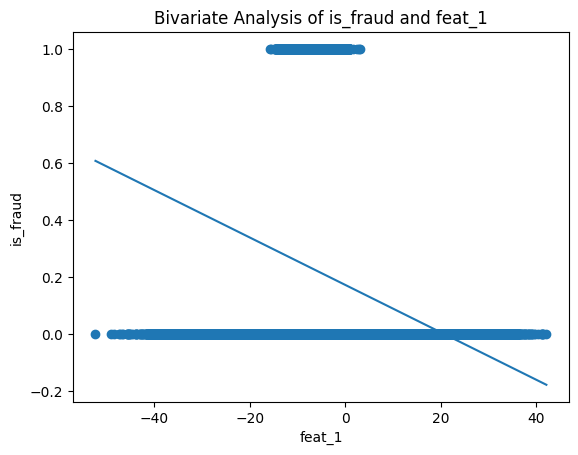

Correlation coefficient between is_fraud and feat_1: -0.19039374084471472


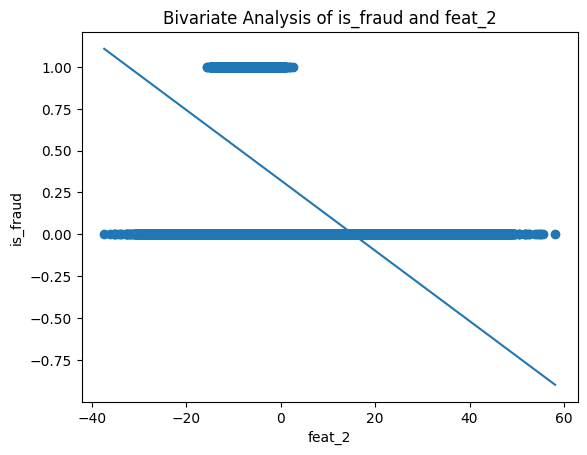

Correlation coefficient between is_fraud and feat_2: -0.577158815219424


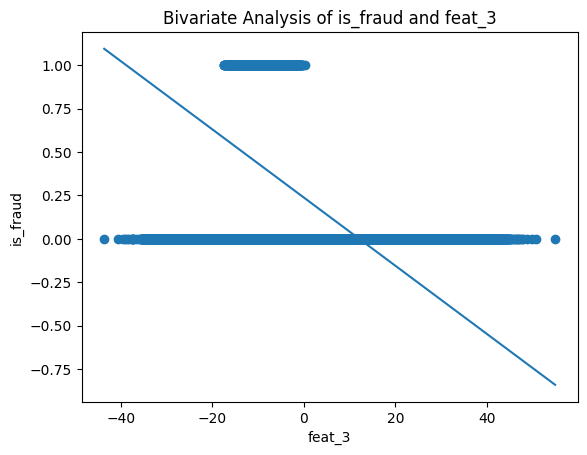

Correlation coefficient between is_fraud and feat_3: -0.5141730394478764


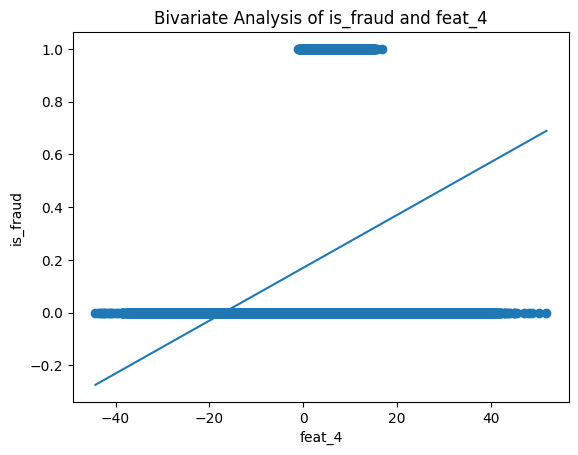

Correlation coefficient between is_fraud and feat_4: 0.23170775196284502


In [20]:

# Identify the dependent and independent variables
dependent_variable = 'is_fraud'
independent_variables = ['feat_1', 'feat_2', 'feat_3', 'feat_4']

# Loop over the independent variables and perform a bivariate analysis with the dependent variable
for independent_variable in independent_variables:

    # Calculate the correlation coefficient between the independent and dependent variables
    correlation_coefficient = np.corrcoef(df[dependent_variable], df[independent_variable])[0, 1]

    # Plot a scatter plot of the independent and dependent variables
    plt.scatter(df[independent_variable], df[dependent_variable])

    # Add a title and axis labels to the plot
    plt.title('Bivariate Analysis of {} and {}'.format(dependent_variable, independent_variable))
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)

    # Add a trendline to the plot
    plt.plot(np.unique(df[independent_variable]), np.poly1d(np.polyfit(df[independent_variable], df[dependent_variable], 1))(np.unique(df[independent_variable])))

    # Show the plot
    plt.show()

    # Print the correlation coefficient
    print('Correlation coefficient between {} and {}: {}'.format(dependent_variable, independent_variable, correlation_coefficient))


In [5]:
df.corr()

,Unnamed: 0,feat_1,feat_2,feat_3,feat_4,is_fraud
Unnamed: 0,1.000000,0.000206,-0.000491,-0.001486,0.001103,0.000774
feat_1,0.000206,1.000000,0.107545,0.095665,-0.044946,-0.190394
feat_2,-0.000491,0.107545,1.000000,0.295774,-0.133348,-0.577159
feat_3,-0.001486,0.095665,0.295774,1.000000,-0.119188,-0.514173
feat_4,0.001103,-0.044946,-0.133348,-0.119188,1.000000,0.231708
is_fraud,0.000774,-0.190394,-0.577159,-0.514173,0.231708,1.000000


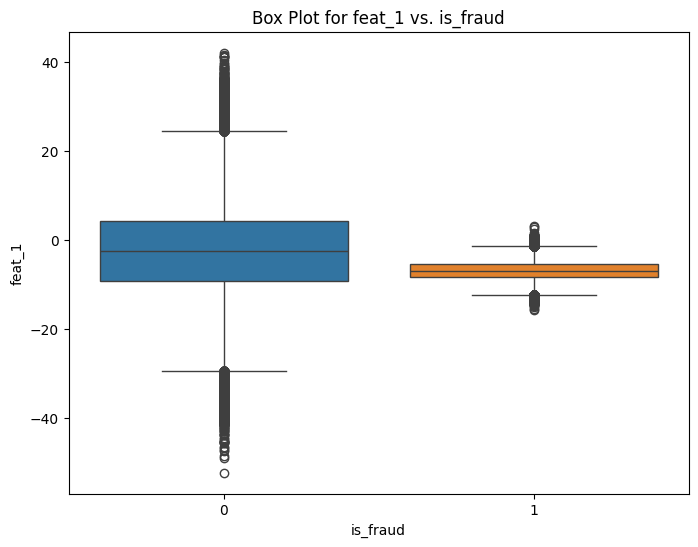

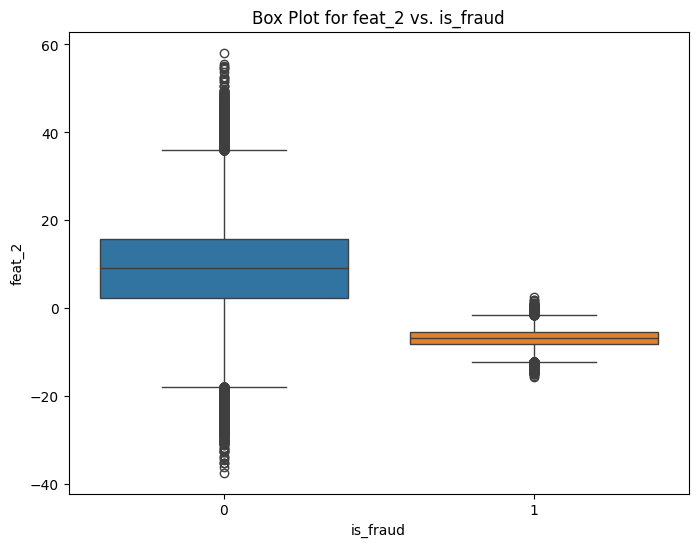

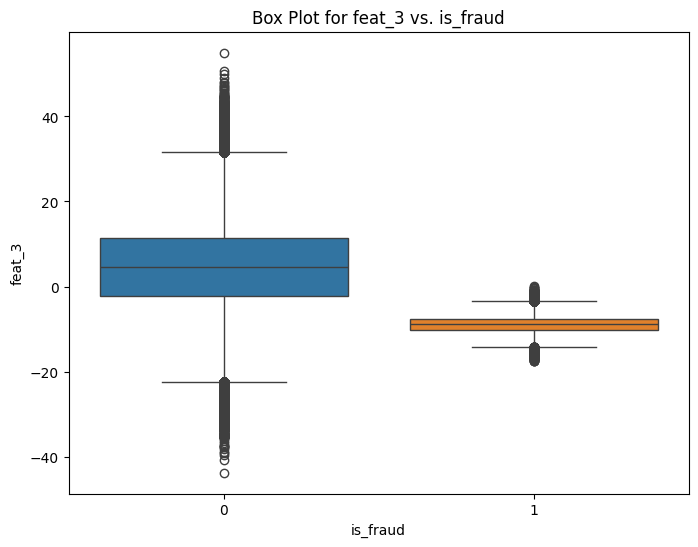

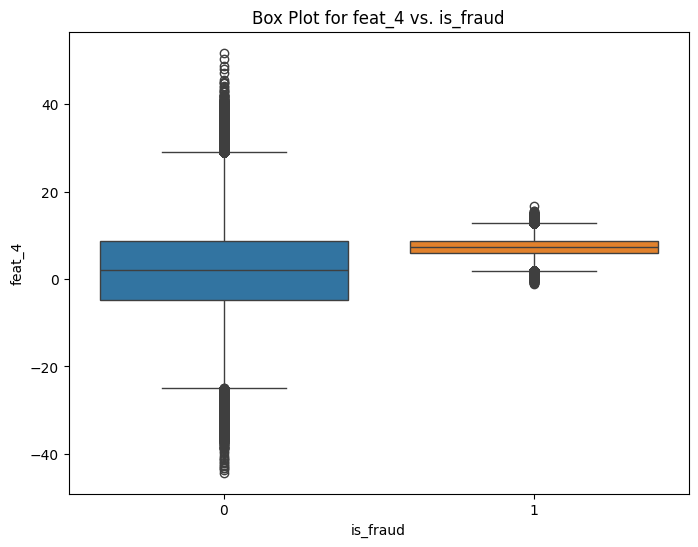

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for the actual_column_name against independent variables
independent_variables = ['feat_1', 'feat_2', 'feat_3', 'feat_4']

for independent_variable in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_fraud', y=independent_variable, data=df, hue='is_fraud', legend=False)
    plt.title(f'Box Plot for {independent_variable} vs. is_fraud')
    plt.xlabel('is_fraud')
    plt.ylabel(independent_variable)
    plt.show()

In [6]:
import pandas as pd
columns = df.columns.tolist()

# Check for categorical data
categorical_data = []
for column in columns:
    if pd.api.types.is_categorical_dtype(df[column]):
        categorical_data.append(column)

# Check for quantitative data
quantitative_data = []
for column in columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        quantitative_data.append(column)

# Check for qualitative data
qualitative_data = []
for column in columns:
    if not pd.api.types.is_categorical_dtype(df[column]) and not pd.api.types.is_numeric_dtype(df[column]):
        qualitative_data.append(column)

# Print the results
print("Categorical data:")
print(categorical_data)
print("Quantitative data:")
print(quantitative_data)
print("Qualitative data:")
print(qualitative_data)

Categorical data:
[]
Quantitative data:
['Unnamed: 0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'is_fraud']
Qualitative data:
[]


C:\Users\Divya Shree\AppData\Local\Temp\ipykernel_22100\2210247602.py:7: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]):
C:\Users\Divya Shree\AppData\Local\Temp\ipykernel_22100\2210247602.py:19: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[column]) and not pd.api.types.is_numeric_dtype(df[column]):


In [7]:
dependent_variable = 'is_fraud'
independent_variables = df.columns.to_list()
independent_variables.remove(dependent_variable)

# Create a crosstab for each independent variable with the dependent variable
for independent_variable in independent_variables:
    crosstab = pd.crosstab(df[dependent_variable], df[independent_variable])

    # Print the crosstab for each independent variable
    print('Crosstab for {}:'.format(independent_variable))
    print(crosstab)

Crosstab for Unnamed: 0:
Unnamed: 0  0       1       2       3       4       5       6       7       \
is_fraud                                                                     
0                1       1       0       0       1       1       1       1   
1                0       0       1       1       0       0       0       0   

Unnamed: 0  8       9       ...  999990  999991  999992  999993  999994  \
is_fraud                    ...                                           
0                1       0  ...       1       0       1       1       1   
1                0       1  ...       0       1       0       0       0   

Unnamed: 0  999995  999996  999997  999998  999999  
is_fraud                                            
0                1       1       1       1       0  
1                0       0       0       0       1  

[2 rows x 1000000 columns]
Crosstab for feat_1:
feat_1    -52.310657  -48.992531  -48.478679  -47.349990  -47.138883  \
is_fraud                    

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Identify the dependent and independent variables
dependent_variable = 'is_fraud'
independent_variables = df.columns.to_list()
independent_variables.remove(dependent_variable)

# Create a contingency table for each independent variable with the dependent variable
for independent_variable in independent_variables:
    contingency_table = pd.crosstab(df[dependent_variable], df[independent_variable])

    # Perform a chi-square test on each contingency table
    chi_square_test = chi2_contingency(contingency_table)

    # Print the results of the chi-square test for each independent variable
    print('Chi-square test results for {}:'.format(independent_variable))
    print('chi-square statistic:', chi_square_test[0])
    print('p-value:', chi_square_test[1])
    print('\n')

Chi-square test results for Unnamed: 0:
chi-square statistic: 1000000.000000003
p-value: 0.49952984198725886


Chi-square test results for feat_1:
chi-square statistic: 1000000.0000000027
p-value: 0.49952984198735734


Chi-square test results for feat_2:
chi-square statistic: 1000000.0000000034
p-value: 0.49952984198716033


Chi-square test results for feat_3:
chi-square statistic: 1000000.0000000033
p-value: 0.4995298419871932


Chi-square test results for feat_4:
chi-square statistic: 1000000.000000002
p-value: 0.4995298419875544




In [9]:
import pandas as pd
from scipy.stats import ttest_ind

# Identify the dependent variable
dependent_variable = 'is_fraud'

# Create a list of all the independent variables in the dataset
independent_variables = df.columns.to_list()
independent_variables.remove(dependent_variable)

# Iterate over the list of independent variables and perform a t-test for each independent variable with the dependent variable
for independent_variable in independent_variables:
    t_test = ttest_ind(df[dependent_variable][df[independent_variable] == 1], df[dependent_variable][df[independent_variable] == 0])

    # Print the results of the t-test for each independent variable
    print('T-test results for {}:'.format(independent_variable))
    print('t-statistic:', t_test.statistic)
    print('p-value:', t_test.pvalue)
    print('\n')


T-test results for Unnamed: 0:
t-statistic: nan
p-value: nan


T-test results for feat_1:
t-statistic: nan
p-value: nan


T-test results for feat_2:
t-statistic: nan
p-value: nan


T-test results for feat_3:
t-statistic: nan
p-value: nan


T-test results for feat_4:
t-statistic: nan
p-value: nan




C:\Users\Divya Shree\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

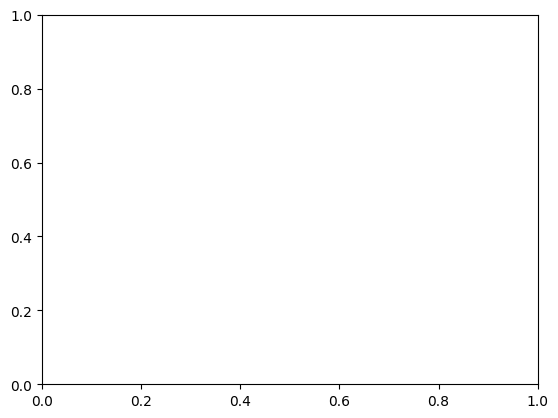

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify the dependent variable
dependent_variable = 'is_fraud'

# Create a list of all the independent variables in the dataset
independent_variables = df.columns.to_list()
independent_variables.remove(dependent_variable)

# Create a boxplot for each independent variable
for independent_variable in independent_variables:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=dependent_variable, by=independent_variable)
    plt.title(f'Boxplot of {dependent_variable} by {independent_variable}')
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    plt.show()

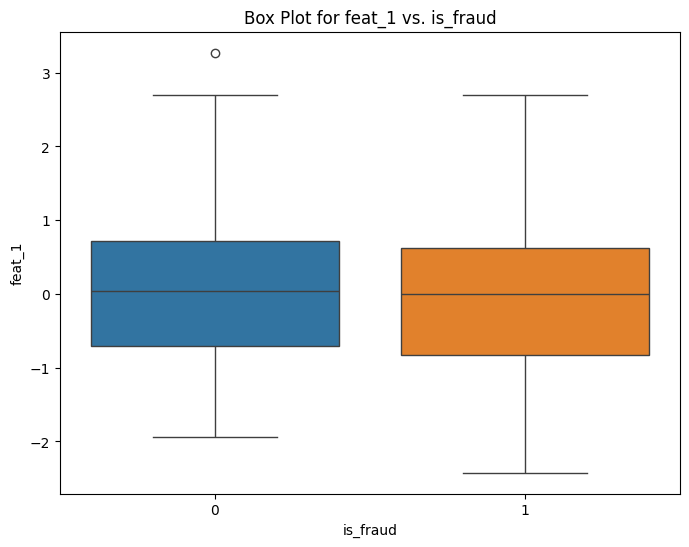

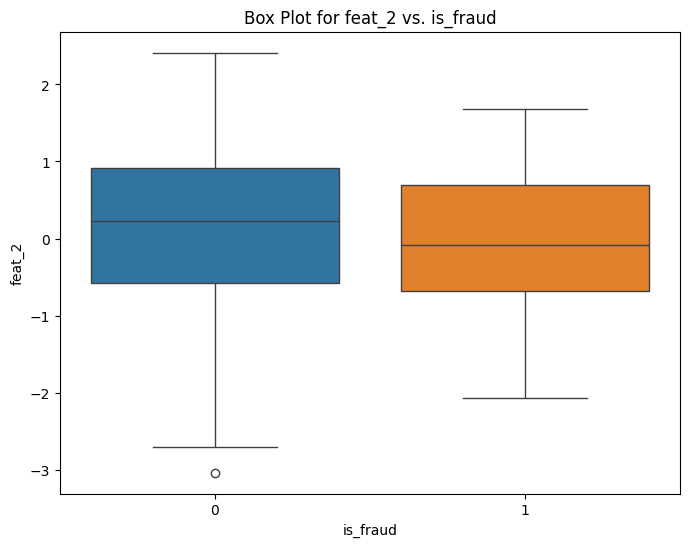

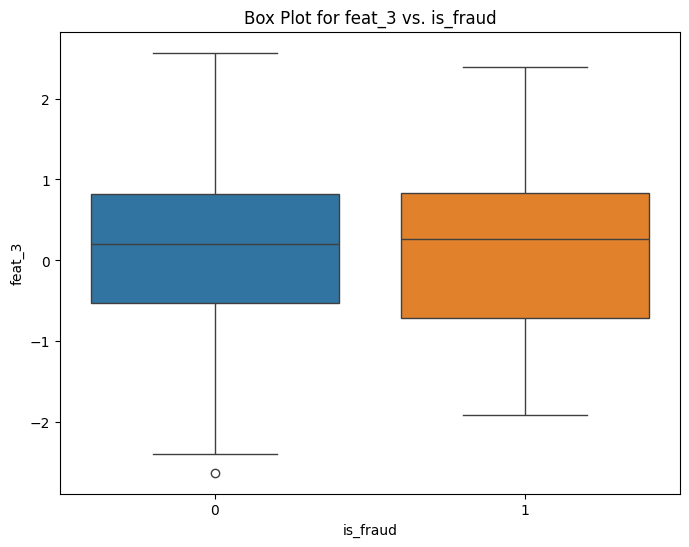

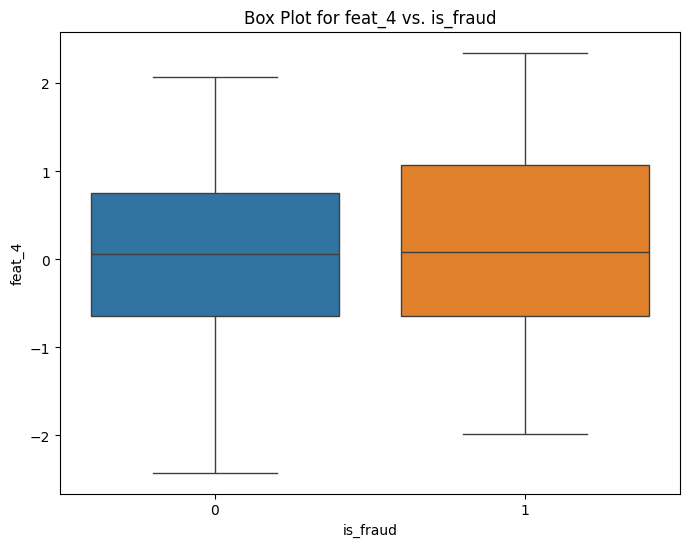

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the data frame (replace this with your actual data)
data = pd.DataFrame({
    'is_fraud': np.random.choice([0, 1], size=150),  # Replace with your actual 'is_fraud' data
    'feat_1': np.random.normal(size=150),  # Replace with your first independenat variable
    'feat_2': np.random.normal(size=150),  # Replace with your second independent variable
    'feat_3': np.random.normal(size=150),
    'feat_4': np.random.normal(size=150)
    # Add more independent variables as needed
})

# Create boxplots for 'is_fraud' against all independent variables
independent_variables = data.columns.difference(['is_fraud'])  # Exclude 'is_fraud'
for independent_variable in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_fraud', y=independent_variable, data=data, hue='is_fraud', legend=False)
    plt.title(f'Box Plot for {independent_variable} vs. is_fraud')
    plt.xlabel('is_fraud')
    plt.ylabel(independent_variable)
    plt.show()
